In [1]:
import pandas as pd
import pyreadstat as py
import glob
import re

In [2]:
paths = 'FSMS\work\*'
glob.glob(paths)

['FSMS\\work\\Données FSMS 13Dec_20_01_14.sav',
 'FSMS\\work\\Données FSMS Jan16_18_02.sav',
 'FSMS\\work\\Données_FSMS_16_08_11.sav',
 'FSMS\\work\\Données_FSMS_24_06_15.sav',
 'FSMS\\work\\Données_FSMS_juil_12.sav',
 'FSMS\\work\\Données_FSMS_juin_15.sav',
 'FSMS\\work\\Données_FSMS_juin_2014.sav',
 'FSMS\\work\\Données_FSMS_nov11_26_12.sav',
 'FSMS\\work\\FSMS_HH_juil13b_1.sav']

In [3]:
date = []
date = ['29-12-2013','20-01-2016','22-07-2011', '03-06-2015','31-07-2012','31-05-2015','26-06-2014', '07-12-2011', '01-07-2013']

In [4]:
data = []
i = 0
for path in glob.glob(paths):
    try:
        df,_ = py.read_sav(path, encoding="ISO-8859-1")
        df['date'] = date[i]
        df.date=pd.to_datetime(df.date)
        print(date[i])
        #print(df["date"])
        data.append(df)
        i +=1
        
    except:
        print('Erreur de lecture', path)


29-12-2013
20-01-2016
22-07-2011
03-06-2015
31-07-2012
31-05-2015
26-06-2014
07-12-2011
01-07-2013


In [5]:
frame = []
for i in range(len(data)):
    try:
        mask = (data[i]['Q4_1'] != 0) | (data[i]['Q4_2'] != 0) | (data[i]['Q4_3'] != 0) | (data[i]['Q4_4'] != 0)
        frame.append(data[i][mask])
    except KeyError as e:
        print(e, len(data[i].columns))


In [6]:
for i in range(len(frame)):
    frame[i].reset_index(drop=True, inplace=True)

In [7]:
moughata= []
for i in range(len(frame)):
    for elt in frame[i].columns.to_list():
        if elt.startswith('MOU'):
            moughata.append((i,elt))
        if elt.startswith("mou"):
            moughata.append((i,elt))
print(moughata)

[(0, 'MOUGHATAA'), (1, 'moughataa'), (2, 'MOUGHATAA'), (3, 'moughataa'), (4, 'MOUGHATAA'), (5, 'moughataa'), (6, 'MOUGHATAA'), (7, 'MOUGHATAA'), (8, 'moughataa')]


In [8]:
for i in range(len(frame)):
    frame[i].rename(columns={'moughataa': 'MOUGHATAA'}, inplace=True)

C:\Users\froge\.conda\envs\analyse\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [21]:
frame[0].columns.to_list()

['SubmissionDate',
 'start',
 'end',
 'today',
 'deviceid',
 'subscriberid',
 'Extrapol',
 'Ponderation',
 'Intro',
 'accord',
 'endinter',
 'CODEKIP',
 'Enqueteur',
 'numord',
 'NUMQUEST',
 'CODREG',
 'MOUGHATAA',
 'infovilZD',
 'NOMVILL',
 'Codevillage',
 'Milieu',
 'EMOP',
 'STRATE',
 'LHZ',
 'lzcode',
 'LHZ_old',
 'Latitudo',
 'Longitudo',
 'Altitudo',
 'Accuraco',
 'Latitude',
 'Longitude',
 'Altitude',
 'Accuracy',
 'Section2',
 'Q2_0c',
 'Q2_0a',
 'Q2_0b',
 'Q2_1',
 'Q2_2',
 'Q2_3',
 'Q2_4',
 'Q2_5',
 'Q2_6M1',
 'Q2_6M2',
 'Q2_6M3',
 'Q2_6M4',
 'Q2_6M5',
 'Q2_6M6',
 'Q2_6F1',
 'Q2_6F2',
 'Q2_6F3',
 'Q2_6F4',
 'Q2_6F5',
 'Q2_6F6',
 'totadulte',
 'totmoins5',
 'tailmen',
 'totmbmen',
 'verif1',
 'Q2_7a',
 'Q2_7b',
 'Q2_8',
 'Q2_9',
 'Q2_10',
 'Q2_11',
 'Section4',
 'Q4_1',
 'Q4_1A',
 'Q4_5_1',
 'Q4_5_2',
 'variz1',
 'Q4_2',
 'Q4_2A',
 'Q4_6_1',
 'Q4_6_2',
 'variz2',
 'Q4_3',
 'Q4_3A',
 'Q4_7_1',
 'Q4_7_2',
 'variz3',
 'Q4_4',
 'Q4_4A',
 'Q4_8_1',
 'Q4_8_2',
 'variz4',
 'Section5',

In [9]:
for i in range(len(frame)):
    print(sorted(frame[i]['MOUGHATAA'].unique()))

[11.0, 13.0, 14.0, 15.0, 16.0, 21.0, 22.0, 23.0, 24.0, 31.0, 33.0, 34.0, 35.0, 41.0, 42.0, 43.0, 44.0, 51.0, 52.0, 53.0, 54.0, 55.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 71.0, 72.0, 73.0, 74.0, 81.0, 91.0, 92.0, 93.0, 101.0, 102.0, 113.0, 121.0, 131.0, 132.0, 133.0, 135.0, 136.0, 137.0, 138.0, 139.0]
[11.0, 13.0, 14.0, 16.0, 21.0, 22.0, 23.0, 24.0, 31.0, 32.0, 33.0, 34.0, 35.0, 41.0, 42.0, 43.0, 44.0, 51.0, 52.0, 53.0, 54.0, 55.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 71.0, 72.0, 73.0, 81.0, 82.0, 91.0, 92.0, 93.0, 101.0, 102.0, 111.0, 113.0, 121.0, 131.0, 132.0, 133.0, 141.0, 142.0, 143.0, 151.0, 152.0, 153.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 9.0, 11.0, 13.0, 14.0, 16.0, 21.0, 22.0, 23.0, 24.0, 31.0, 33.0, 41.0, 42.0, 43.0, 44.0, 51.0, 52.0, 53.0, 54.0, 55.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 71.0, 72.0, 91.0, 93.0, 101.0, 102.0, 121.0]
[11.0, 12.0, 13.0, 14.0, 16.0, 21.0, 22.0, 23.0, 24.0, 31.0, 32.0, 33.0, 34.0, 41.0, 42.0, 43.0, 44.0, 51.0, 53.0, 55.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 7

In [10]:
for i in range(len(frame)):
    num = len(frame[i]['MOUGHATAA'].unique())
    print(num)

48
50
38
44
52
43
39
46
49


In [11]:
lm = pd.read_csv("liste_moughataa.csv")

In [12]:
def mou_name(moughataa):
    for i in range(len(lm["numero"])):
        if lm["numero"][i] == moughataa:
            return lm["nom"][i]

In [13]:
Moughata_frame = pd.DataFrame(columns=["date", "Moughata", "nom", "FCS<42", "Ratio", 'pop_Moughata_tt',"Pop_echa"])
for i in range(len(frame)):
    num = len(frame[i]['MOUGHATAA'].unique())
    for n in sorted(frame[i]['MOUGHATAA'].unique()):
        pop = len(frame[i])
        fcs_df = frame[i].loc[frame[i]['MOUGHATAA'] == n]
        date = frame[i]['date'][0]
        FCS = (fcs_df['FCS'] < 42).sum()
        if FCS == 0:
            ratio = 0
        else:
            ratio = ((fcs_df['FCS'] < 42).sum()) / (len(fcs_df))
        name = mou_name(n)
        Moughata_frame = Moughata_frame.append({'date' : date, 'Moughata' : n,'nom': name, 'FCS<42' : FCS, 'Ratio': ratio, 'pop_Moughata_tt':len(fcs_df),'Pop_echa': pop}, ignore_index=True)

In [14]:
Moughata_frame.head(20)

,date,Moughata,nom,FCS<42,Ratio,pop_Moughata_tt,Pop_echa
0,2013-12-29,11.0,BASSIKOUNOU,20,0.307692,65,2305
1,2013-12-29,13.0,DJIGUENI,3,0.093750,32,2305
2,2013-12-29,14.0,NEMA,11,0.211538,52,2305
3,2013-12-29,15.0,OUALATA,0,0.000000,11,2305
4,2013-12-29,16.0,TIMBEDRA,7,0.159091,44,2305
5,2013-12-29,21.0,AIOUN AL ALTROUS,1,0.020833,48,2305
6,2013-12-29,22.0,KOBERNRI,1,0.011628,86,2305
7,2013-12-29,23.0,TAMCHEKETT,2,0.043478,46,2305
8,2013-12-29,24.0,TINTANE,2,0.032787,61,2305
9,2013-12-29,31.0,BARKEWOL,18,0.219512,82,2305


In [15]:
Moughata_frame[Moughata_frame['Moughata']==11]

,date,Moughata,nom,FCS<42,Ratio,pop_Moughata_tt,Pop_echa
0,2013-12-29,11.0,BASSIKOUNOU,20,0.307692,65,2305
48,2016-01-20,11.0,BASSIKOUNOU,12,0.210526,57,2271
104,2011-07-22,11.0,BASSIKOUNOU,19,0.452381,42,1389
136,2015-03-06,11.0,BASSIKOUNOU,29,0.690476,42,2178
180,2012-07-31,11.0,BASSIKOUNOU,45,0.420561,107,4471
232,2015-05-31,11.0,BASSIKOUNOU,19,0.452381,42,2181
275,2014-06-26,11.0,BASSIKOUNOU,29,0.617021,47,1768
314,2011-07-12,11.0,BASSIKOUNOU,17,0.377778,45,1958
360,2013-01-07,11.0,BASSIKOUNOU,28,0.350000,80,2369


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def graph(df):
    moy = df["Ratio"].mean()
    med = df["Ratio"].median()
    f, ax = plt.subplots(figsize=(10, 10))
    g =sns.histplot(x="Ratio", data=df, fill=True)
    g.axvline(moy, color='green', ls='-', lw=3, label='Moyenne')
    g.axvline(med, color='red', ls='-', lw=3, label='Mediane')
    print(df.index.unique())
    print("moyenne :", round(moy,2))
    print("mediane :", round(med,2))
    print("min :", df["Ratio"].min())
    print("max :", round(df["Ratio"].max(),2))
    plt.show()

In [18]:
df = Moughata_frame.set_index('date')

DatetimeIndex(['2013-12-29'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.12
mediane : 0.09
min : 0.0
max : 0.39


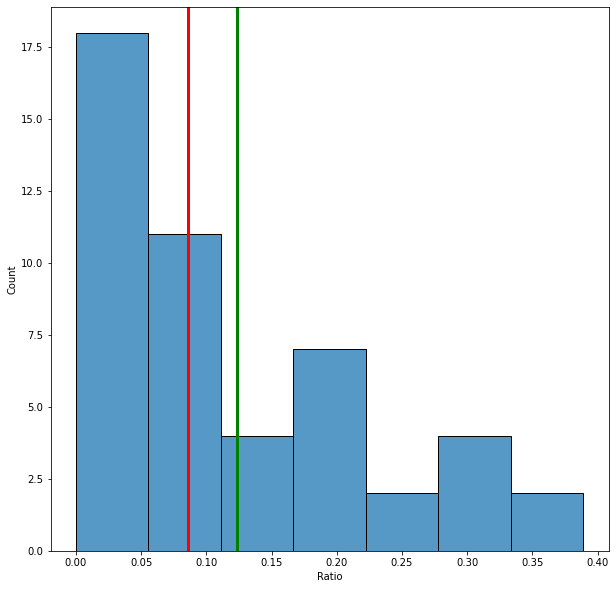

DatetimeIndex(['2016-01-20'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.13
mediane : 0.12
min : 0.0
max : 0.35


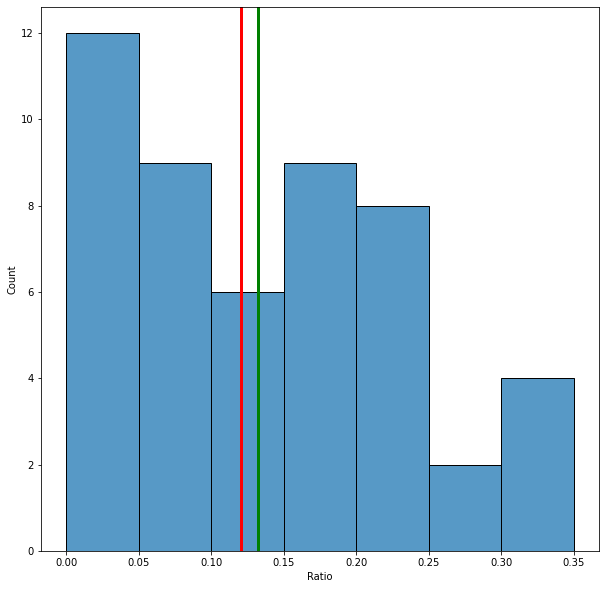

DatetimeIndex(['2011-07-22'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.15
mediane : 0.12
min : 0.0
max : 0.45


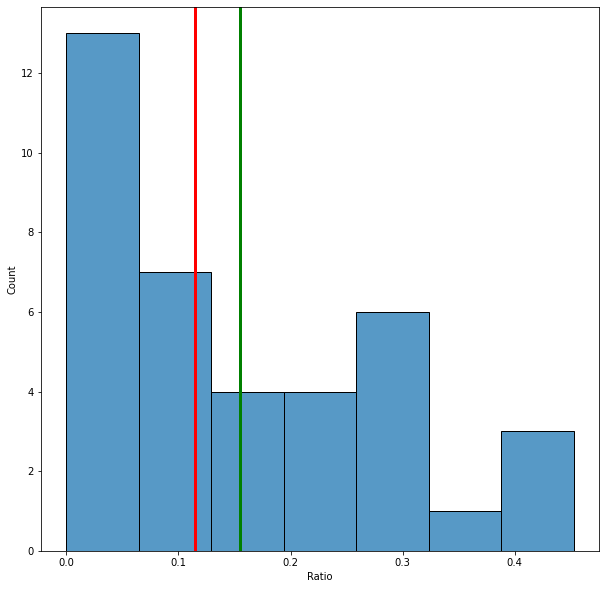

DatetimeIndex(['2015-03-06'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.3
mediane : 0.22
min : 0.0
max : 1.0


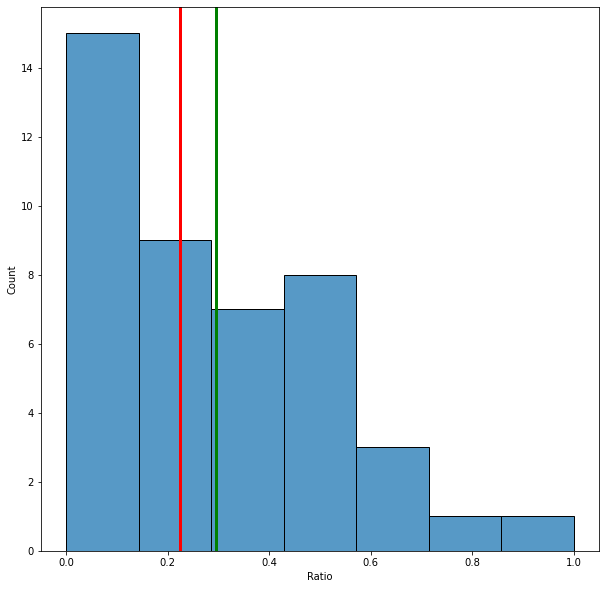

DatetimeIndex(['2012-07-31'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.3
mediane : 0.35
min : 0.0
max : 0.67


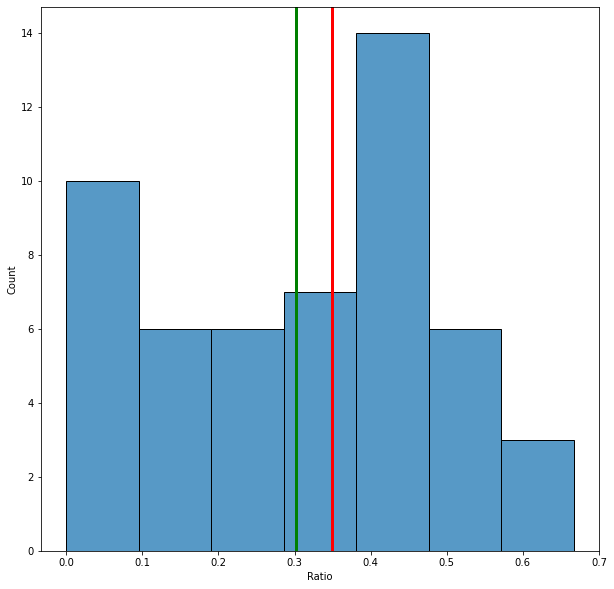

DatetimeIndex(['2015-05-31'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.28
mediane : 0.27
min : 0.0
max : 1.0


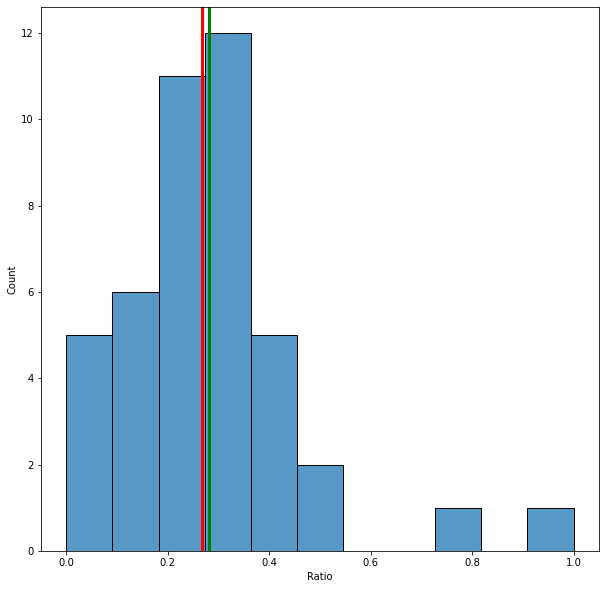

DatetimeIndex(['2014-06-26'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.18
mediane : 0.17
min : 0.0
max : 0.69


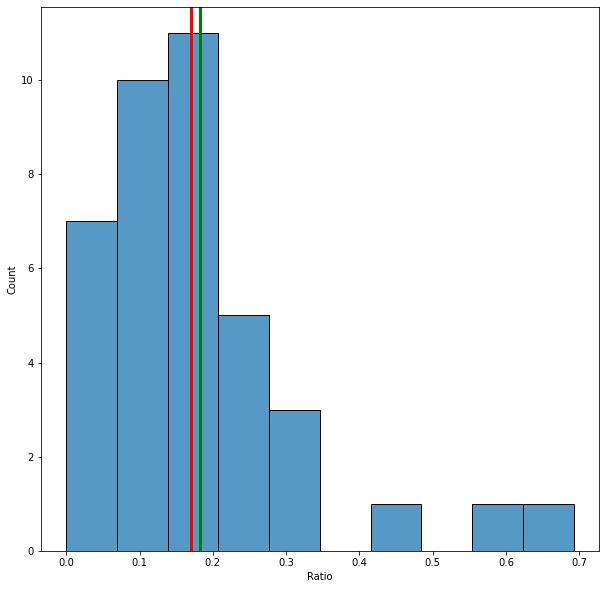

DatetimeIndex(['2011-07-12'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.18
mediane : 0.18
min : 0.0
max : 0.8


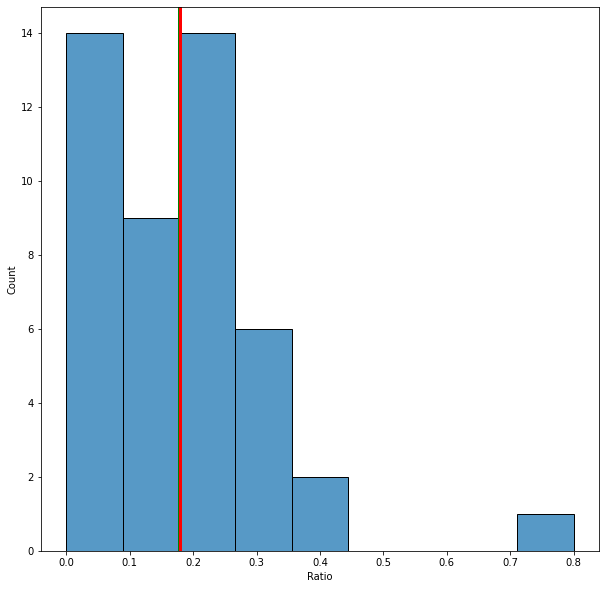

DatetimeIndex(['2013-01-07'], dtype='datetime64[ns]', name='date', freq=None)
moyenne : 0.19
mediane : 0.2
min : 0.0
max : 0.64


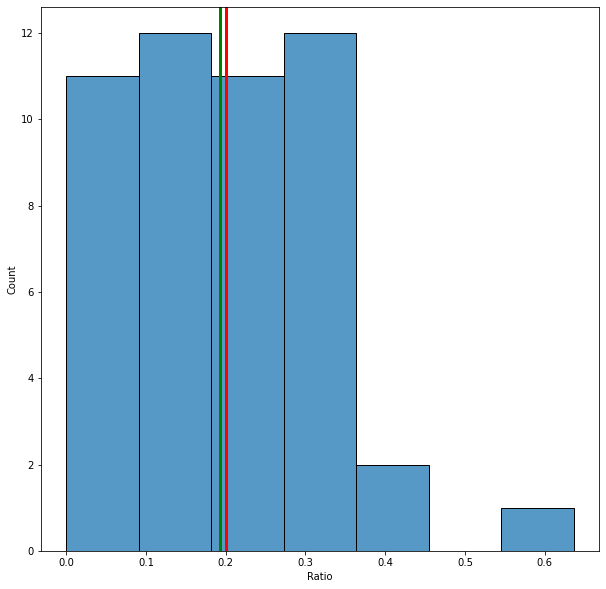

In [19]:
for date in df.index.unique():
    graph(df.loc[date])

In [20]:
Moughata_frame.to_csv('mougahataa_ia_2012-2016.csv')